In [2]:
import pandas as pd
import math
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random
from sklearn.metrics import confusion_matrix
df=pd.read_excel('Synthetic Data_FA-ICC_28.07.2023 (003)_Statical.xlsx', sheet_name='Transactions')
df=df.iloc[:, : 15]

In [3]:
# Define risk ranges
risk_ranges = {
    'low': (0, 3.9),
    'medium': (3.91, 5.05),
    'high': (5.06, 8),
    'ultrahigh': (8.01, 10)
}

# Generate unique risk scores for each country based on risk level
unique_risk_scores = {}
for country, risk_level in zip(df['Counterparty_Country'], df['Risk_Country']):
    if country not in unique_risk_scores:
        low, high = risk_ranges[risk_level]
        unique_risk_scores[country] = round(np.random.uniform(low, high), 2)

# Map the risk scores to the dataframe
df['RiskScore'] = df['Counterparty_Country'].map(unique_risk_scores)

print(df)

        Record_Ref  Account_ID  Customer_ID                 IBAN_Customer  \
0                1      235771         1800  DE 82 1344 0446 6575 2504 18   
1                2      474476         1863  DE 52 3415 0476 9012 3978 90   
2                3      361741         1283  DE 30 3594 0530 5203 3041 29   
3                4      409578         1820  DE 80 2108 0628 6926 3482 60   
4                5      261986         1812  DE 82 3762 0709 5384 6520 45   
...            ...         ...          ...                           ...   
799995      799996      211819         7673  DE 70 1326 0326 7825 6135 49   
799996      799997      355955         7363  DE 11 2701 0686 4366 6013 37   
799997      799998      487217         7301  DE 29 4168 0128 4099 1413 60   
799998      799999      482540         7362  DE 73 1722 0796 8072 4996 16   
799999      800000      472327         7209  DE 16 4301 0328 5647 4331 33   

                 Transaction_Type Date_Transaction  Month_Transaction  \
0 

In [14]:
df

,Record_Ref,Account_ID,Customer_ID,IBAN_Customer,Transaction_Type,Date_Transaction,Month_Transaction,Amount_EUR,IBAN_Counterparty,Customer_Note,Counterparty_Note,Debit_Credit,Counterparty_Name,Counterparty_Country,Risk_Country,RiskScore,Date_Transaction_with_hours
0,1,235771,1800,DE 82 1344 0446 6575 2504 18,Cash/ Check,2023-03-11,3,22965,DE 30 5672 0156 6646 7962 42,NaN,NaN,Credit,Kraus Öl- und Gasdienstleistungen GmBH,DE,low,0.55,2023-03-11 16:13:17
1,2,474476,1863,DE 52 3415 0476 9012 3978 90,Cash/ Check,2023-03-22,3,21569,DE 45 4517 0902 8818 7954 22,NaN,NaN,Credit,Heinz and Lotto Advertising Agency Ltd,DE,low,0.55,2023-03-22 12:09:43
2,3,361741,1283,DE 30 3594 0530 5203 3041 29,Cash/ Check,2023-04-03,4,25465,DE 57 5529 0508 2106 3528 93,NaN,82951AW Rechnung Elektronische Geräte,Credit,Scheffler KG,DE,low,0.55,2023-04-03 04:50:55
3,4,409578,1820,DE 80 2108 0628 6926 3482 60,Cash/ Check,2023-04-05,4,22072,DE 45 8083 0545 7511 8621 62,NaN,NaN,Credit,Raab Heil GmbH,DE,low,0.55,2023-04-05 05:42:34
4,5,261986,1812,DE 82 3762 0709 5384 6520 45,Cash/ Check,2023-04-11,4,23320,DE 76 8860 0597 1014 9618 52,NaN,NaN,Credit,Tokato Credit Finance Company Ltd,DE,low,0.55,2023-04-11 15:55:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,799996,211819,7673,DE 70 1326 0326 7825 6135 49,SEPA transfers in Germany,2023-03-29,3,2726,DE 16 3442 0980 9515 4234 16,NaN,NaN,Credit,Mahlke Joshua e.V.,DE,low,0.55,2023-03-29 13:13:20
799996,799997,355955,7363,DE 11 2701 0686 4366 6013 37,SEPA transfers in Germany,2023-03-12,3,724,DE 55 7379 0638 4369 5779 70,NaN,NaN,Credit,Zill Laurin e.V.,DE,low,0.55,2023-03-12 23:59:51
799997,799998,487217,7301,DE 29 4168 0128 4099 1413 60,SEPA transfers in Germany,2023-05-17,5,343,DE 60 9515 0853 6740 9252 13,NaN,NaN,Credit,Pasch Arda e.V.,DE,low,0.55,2023-05-17 18:22:01
799998,799999,482540,7362,DE 73 1722 0796 8072 4996 16,SEPA transfers in Germany,2023-05-24,5,1358,DE 78 1176 0911 2996 8305 31,NaN,NaN,Credit,Schirra Paul e.V.,DE,low,0.55,2023-05-24 10:32:16


In [4]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random
from sklearn.metrics import confusion_matrix

data = pd.to_datetime(df['Date_Transaction'])
unique_days= sorted(data)
# Function to add random time to a datetime object
def add_random_time(date):
    # Generate random hour, minute, and second
    random_hour = random.randint(0, 23)
    random_minute = random.randint(0, 59)
    random_second = random.randint(0, 59)
    
    # Replace the time part with the random time
    return date.replace(hour=random_hour, minute=random_minute, second=random_second)

# Apply the function to each element in the series
data_with_random_time = data.apply(add_random_time)

# Print the result
print(data_with_random_time)
df['Date_Transaction_with_hours']=data_with_random_time
unique_days= sorted(data.unique())




0        2023-03-11 16:13:17
1        2023-03-22 12:09:43
2        2023-04-03 04:50:55
3        2023-04-05 05:42:34
4        2023-04-11 15:55:18
                 ...        
799995   2023-03-29 13:13:20
799996   2023-03-12 23:59:51
799997   2023-05-17 18:22:01
799998   2023-05-24 10:32:16
799999   2023-03-11 04:20:08
Name: Date_Transaction, Length: 800000, dtype: datetime64[ns]


In [5]:
x = pd.Series()

day=unique_days[40]

comparison_date = [day+pd.Timedelta(days=0), day +pd.Timedelta(days=1), day+ pd.Timedelta(days=2), day +pd.Timedelta(days=3)]

extra_day = day +pd.Timedelta(days=3)

transactions_of_interest = df[df['Date_Transaction'].isin(comparison_date)]
risk_mapping = {'low': 1, 'medium': 2, 'high': 3, 'ultrahigh': 4}
transactions_of_interest['Risk_Country_numeric'] = transactions_of_interest['Risk_Country'].map(risk_mapping)

transactions_of_interest['Amount_EUR_abs'] = transactions_of_interest['Amount_EUR'].abs()

# Group by client and date, sum the amounts and get the highest risk value
trans_by_client_2 = transactions_of_interest.groupby('Customer_ID').agg({'Amount_EUR_abs': 'sum', 'RiskScore': 'max'}).reset_index()

# Sort the DataFrame by 'Customer_ID' and 'Date_Transaction'
transactions_of_interest = transactions_of_interest.sort_values(by=['Customer_ID', 'Date_Transaction_with_hours'])

# Calculate the cumulative sum of 'Amount_EUR_abs' for each 'Customer_ID'
transactions_of_interest['Cumulative_Sum'] = transactions_of_interest.groupby('Customer_ID')['Amount_EUR_abs'].cumsum()

# Define the threshold
threshold = 10000

# Identify the first instance where the cumulative sum exceeds the threshold for each client
threshold_reached = transactions_of_interest[transactions_of_interest['Cumulative_Sum'] > threshold].groupby('Customer_ID').first().reset_index()

# Select only necessary columns and rename for clarity
threshold_reached = threshold_reached[['Customer_ID', 'Date_Transaction_with_hours']].rename(columns={'Date_Transaction_with_hours': 'threshold_reached'})

# Group by client and summarize amounts and risk
trans_by_client_2 = transactions_of_interest.groupby('Customer_ID').agg({
    'Amount_EUR_abs': 'sum',
    'RiskScore': 'max'
}).reset_index()

# Merge the threshold reached datetime with the grouped data
trans_by_client_2 = pd.merge(trans_by_client_2, threshold_reached, on='Customer_ID', how='left')
trans_by_client_2['threshold_reached'] = pd.to_datetime(trans_by_client_2['threshold_reached'])


cluster=[]
hour_difference = []
for i in range(len(trans_by_client_2)):
    hour_difference.append(24*(trans_by_client_2.iloc[i]['threshold_reached'].day - comparison_date[0].day)+trans_by_client_2.iloc[i]['threshold_reached'].hour)
    if trans_by_client_2.iloc[i]['RiskScore']>3.4 and trans_by_client_2.iloc[i]['RiskScore']<5.10:
        mylist = [0, 1]
        weigh=[1-min(trans_by_client_2.iloc[i]['Amount_EUR_abs'], 10000)/25000, min(trans_by_client_2.iloc[i]['Amount_EUR_abs'], 10000)/25000]
        cluster.append(random.choices(mylist, weights = weigh, k = 1)[0])
    else:
        cluster.append(0)


trans_by_client_2['cluster']=cluster
trans_by_client_2['hour'] =hour_difference
trans_by_client=trans_by_client_2

/tmp/ipykernel_26540/4165985810.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  x = pd.Series()
/tmp/ipykernel_26540/4165985810.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_of_interest['Risk_Country_numeric'] = transactions_of_interest['Risk_Country'].map(risk_mapping)
/tmp/ipykernel_26540/4165985810.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_of

In [ ]:
for day in unique_days[:-2]:
    comparison_date = [day+pd.Timedelta(days=0), day +pd.Timedelta(days=1), day+ pd.Timedelta(days=2), day +pd.Timedelta(days=3)]

    extra_day = day +pd.Timedelta(days=3)

    transactions_of_interest = df[df['Date_Transaction'].isin(comparison_date)]
    risk_mapping = {'low': 1, 'medium': 2, 'high': 3, 'ultrahigh': 4}
    transactions_of_interest['Risk_Country_numeric'] = transactions_of_interest['Risk_Country'].map(risk_mapping)

    transactions_of_interest['Amount_EUR_abs'] = transactions_of_interest['Amount_EUR'].abs()

    # Group by client and date, sum the amounts and get the highest risk value
    trans_by_client_4 = transactions_of_interest.groupby('Customer_ID').agg({'Amount_EUR_abs': 'sum', 'RiskScore': 'max'}).reset_index()

    # Sort the DataFrame by 'Customer_ID' and 'Date_Transaction'
    transactions_of_interest = transactions_of_interest.sort_values(by=['Customer_ID', 'Date_Transaction_with_hours'])

    # Calculate the cumulative sum of 'Amount_EUR_abs' for each 'Customer_ID'
    transactions_of_interest['Cumulative_Sum'] = transactions_of_interest.groupby('Customer_ID')['Amount_EUR_abs'].cumsum()

    # Define the threshold
    threshold = 10000

    # Identify the first instance where the cumulative sum exceeds the threshold for each client
    threshold_reached = transactions_of_interest[transactions_of_interest['Cumulative_Sum'] > threshold].groupby('Customer_ID').first().reset_index()

    # Select only necessary columns and rename for clarity
    threshold_reached = threshold_reached[['Customer_ID', 'Date_Transaction_with_hours']].rename(columns={'Date_Transaction_with_hours': 'threshold_reached'})

    # Group by client and summarize amounts and risk
    trans_by_client_4 = transactions_of_interest.groupby('Customer_ID').agg({
        'Amount_EUR_abs': 'sum',
        'RiskScore': 'max'
    }).reset_index()

    # Merge the threshold reached datetime with the grouped data
    trans_by_client_4 = pd.merge(trans_by_client_4, threshold_reached, on='Customer_ID', how='left')
    trans_by_client_4['threshold_reached'] = pd.to_datetime(trans_by_client_4['threshold_reached'])


    cluster=[]
    hour_difference = []
    for i in range(len(trans_by_client_4)):
        hour_difference.append(24*(trans_by_client_4.iloc[i]['threshold_reached'].day - comparison_date[0].day)+trans_by_client_4.iloc[i]['threshold_reached'].hour)
        if trans_by_client_4.iloc[i]['RiskScore']>3.4 and trans_by_client.iloc[i]['RiskScore']<5.10:
            mylist = [0, 1]
            weigh=[1-min(trans_by_client_4.iloc[i]['Amount_EUR_abs'], 10000)/25000, min(trans_by_client_4.iloc[i]['Amount_EUR_abs'], 10000)/25000]
            cluster.append(random.choices(mylist, weights = weigh, k = 1)[0])
        else:
            cluster.append(0)


    trans_by_client_4['cluster']=cluster
    trans_by_client_4['hour'] =hour_difference
    trans_by_client = pd.concat([trans_by_client,trans_by_client_4 ])


In [7]:
trans_by_client

,Customer_ID,Amount_EUR_abs,RiskScore,threshold_reached,cluster,hour
0,1000,15384,4.37,2023-04-13 02:28:51,1,74.0
1,1001,12680,3.86,2023-04-12 21:19:23,1,69.0
2,1002,23472,2.69,2023-04-11 09:16:28,0,33.0
3,1007,54739,4.58,2023-04-11 22:36:27,0,46.0
4,1009,21803,4.92,2023-04-12 06:22:07,1,54.0
...,...,...,...,...,...,...
2993,8987,12982,4.34,2023-05-31 07:15:22,1,55.0
2994,8989,47946,4.98,2023-05-29 16:55:30,1,16.0
2995,8990,16941,4.03,2023-05-30 15:09:55,0,39.0
2996,8991,9643,4.35,NaT,1,NaN


In [10]:
false_negatives_all = trans_by_client[((trans_by_client['hour']>72) | (trans_by_client['RiskScore']<4.1) | (trans_by_client['Amount_EUR_abs']<10000)) & (trans_by_client['cluster']==1)]

In [12]:
sorted_df_all = false_negatives_all.sort_values(by=['Amount_EUR_abs'], ascending=False)

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial import distance

# Step 1: Create a DataFrame
data = {
    'x1': [10050, 9900, 10100, 9800],
    'x2': [70, 75, 72, 71],
    'x3': [4.0, 4.2, 3.9, 4.3]
}
df = pd.DataFrame(data)

# Step 2: Define the means for each dimension
mean = np.array([10000, 72, 4.1])

# Step 3: Extract the DataFrame values as a NumPy array
X = df.values

# Step 4: Calculate the covariance matrix from the DataFrame
cov_matrix = np.cov(X, rowvar=False)

# Step 5: Calculate the inverse of the covariance matrix
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Step 6: Example point to evaluate
point = np.array([10050, 70, 4.0])  # Replace with your point of interest

# Step 7: Calculate the deviation (Mahalanobis distance)
diff = point - mean
mahalanobis_distance = np.sqrt(np.dot(np.dot(diff, inv_cov_matrix), diff.T))

print("Mahalanobis Distance (Deviation from mean):", mahalanobis_distance)


In [ ]:
sd1_all = sorted_df_all.head(int(len(false_negatives_all)*0.68)).iloc[-1]['Amount_EUR_abs']
sd2_all = sorted_df_all.head(int(len(false_negatives_all)*0.95)).iloc[-1]['Amount_EUR_abs']
sd3_all = sorted_df_all.head(int(len(false_negatives_all)*0.99)).iloc[-1]['Amount_EUR_abs']
print(sd1_time)
print(sd2_time)
print(sd3_time)

85.0
93.0
95.0


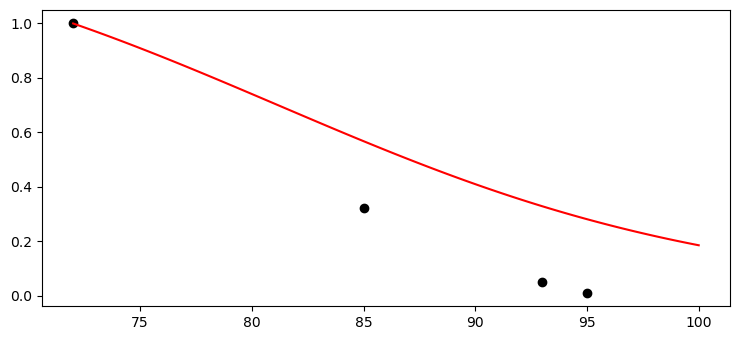

In [97]:
false_negatives_time = trans_by_client[(trans_by_client['hour']>72) & (trans_by_client['cluster']==1)]
sorted_df_time = false_negatives_time.sort_values(by=['hour'], ascending=True)
sorted_df_time
sd1_time = sorted_df_time.head(int(len(false_negatives_time)*0.68)).iloc[-1]['hour']
sd2_time = sorted_df_time.head(int(len(false_negatives_time)*0.95)).iloc[-1]['hour']
sd3_time = sorted_df_time.head(int(len(false_negatives_time)*0.99)).iloc[-1]['hour']
print(sd1_time)
print(sd2_time)
print(sd3_time)

In [6]:
false_negatives_risk = trans_by_client[(trans_by_client['RiskScore']<4.1) & (trans_by_client['cluster']==1)]
sorted_df_risk = false_negatives_risk.sort_values(by=['RiskScore'], ascending=False)
print(sorted_df_risk)
sd1_risk = sorted_df_risk.head(int(len(false_negatives_risk)*0.68)).iloc[-1]['RiskScore']
sd2_risk = sorted_df_risk.head(int(len(false_negatives_risk)*0.95)).iloc[-1]['RiskScore']
sd3_risk = sorted_df_risk.head(int(len(false_negatives_risk)*0.99)).iloc[-1]['RiskScore']
print(sd1_risk)
print(sd2_risk)
print(sd3_risk)

      Customer_ID  Amount_EUR_abs  RiskScore   threshold_reached  cluster  \
1434         4647           50342       4.08 2023-05-18 05:13:21        1   
1683         5270           44588       4.08 2023-05-23 17:01:20        1   
1311         4311           30197       4.08 2023-04-01 09:18:35        1   
688          2708           33017       4.08 2023-04-11 03:46:41        1   
1972         6033           27946       4.08 2023-04-01 00:13:53        1   
...           ...             ...        ...                 ...      ...   
2016         6166           17922       3.48 2023-03-22 02:15:50        1   
1846         5704           25545       3.48 2023-04-09 21:16:10        1   
1446         4673           14339       3.48 2023-05-19 02:47:46        1   
2584         7865           18450       3.48 2023-03-07 13:52:31        1   
1844         5702           43194       3.48 2023-03-28 08:06:39        1   

       hour  
1434   29.0  
1683   17.0  
1311 -711.0  
688    27.0  
1972 

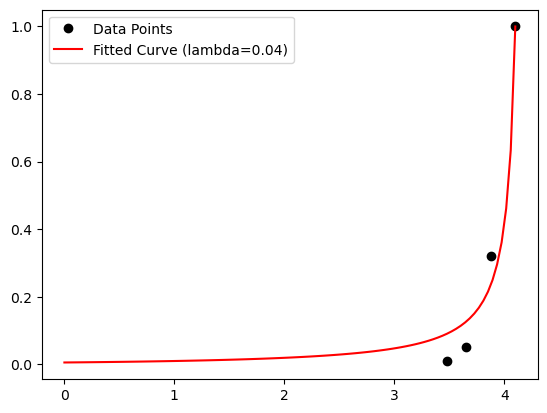

Optimal lambda: 0.04


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Given function f(x, lambd)
def f(x, lambd=3.5):
    return lambd / (np.exp((4.1-x) / 2) - 1 + lambd)

# Data points
x_sd = np.array([4.1, sd1_risk,sd2_risk, sd3_risk])
y_sd = np.array([1, 1 - 0.68,1-0.95, 1 - 0.99])

# Objective function to minimize the squared error
def objective(lambd):
    y_pred = f(x_sd, lambd)
    return np.sum((y_pred - y_sd) ** 2)

# Initial guess for lambda
initial_lambd = 1

# Optimization using scipy
result = minimize(objective, initial_lambd, bounds=[(0.01, 10)])  # Setting bounds to avoid negative lambda values
optimal_lambd = result.x[0]

# Plot the results
x = np.linspace(0, 4.1, 100)
plt.plot(x_sd, y_sd, 'o', color='black', label='Data Points')
plt.plot(x, f(x, optimal_lambd), color='red', label=f'Fitted Curve (lambda={optimal_lambd:.2f})')
plt.legend()
plt.show()

# Print the optimal lambda value
print(f"Optimal lambda: {optimal_lambd:.2f}")

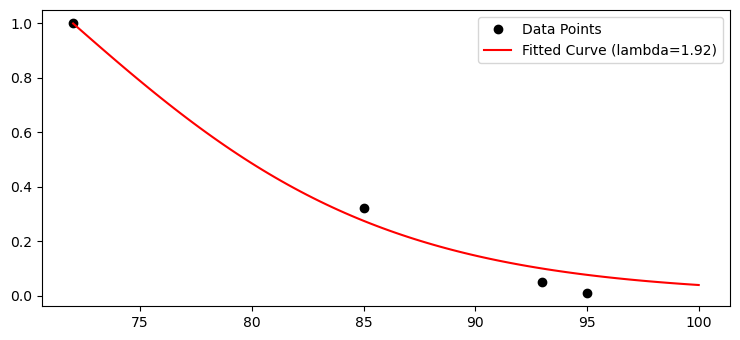

Optimal lambda: 1.92


In [99]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Given function f(x, lambd)
def f(x, lambd=3.5):
    return lambd / (np.exp((x - 72) / 7.2) - 1 + lambd)

# Data points
x_sd = np.array([72, sd1_time, sd2_time, sd3_time])
y_sd = np.array([1, 1 - 0.68, 1 - 0.95, 1 - 0.99])

# Objective function to minimize the squared error
def objective(lambd):
    y_pred = f(x_sd, lambd)
    return np.sum((y_pred - y_sd) ** 2)

# Initial guess for lambda
initial_lambd = 3.5

# Optimization using scipy
result = minimize(objective, initial_lambd, bounds=[(0.01, 10)])  # Setting bounds to avoid negative lambda values
optimal_lambd = result.x[0]

# Plot the results
x = np.linspace(72, 100, 100)
plt.plot(x_sd, y_sd, 'o', color='black', label='Data Points of sigmas')
plt.plot(x, f(x, optimal_lambd), color='red', label=f'Fitted Curve (lambda={optimal_lambd:.2f})')
plt.legend()
plt.show()

# Print the optimal lambda value
print(f"Optimal lambda: {optimal_lambd:.2f}")


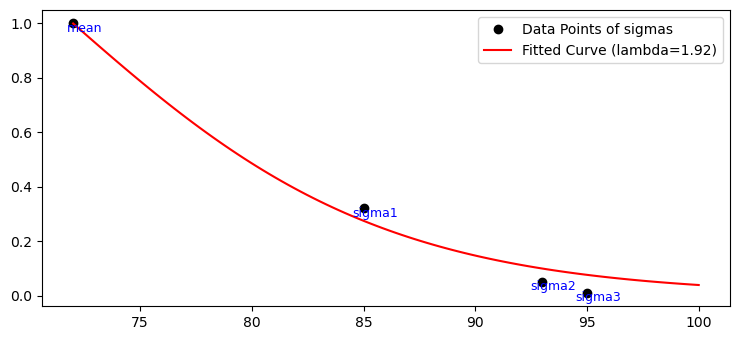

Optimal lambda: 1.92


In [117]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Given function f(x, lambd)
def f(x, lambd=3.5):
    return lambd / (np.exp((x - 72) / 7.2) - 1 + lambd)

# Data points
x_sd = np.array([72, sd1_time, sd2_time, sd3_time])
y_sd = np.array([1, 1 - 0.68, 1 - 0.95, 1 - 0.99])
point_labels = ['mean', 'sigma1', 'sigma2', 'sigma3']

# Objective function to minimize the squared error
def objective(lambd):
    y_pred = f(x_sd, lambd)
    return np.sum((y_pred - y_sd) ** 2)

# Initial guess for lambda
initial_lambd = 3.5

# Optimization using scipy
result = minimize(objective, initial_lambd, bounds=[(0.01, 10)])  # Setting bounds to avoid negative lambda values
optimal_lambd = result.x[0]

# Plot the results
x = np.linspace(72, 100, 100)
plt.plot(x_sd, y_sd, 'o', color='black', label='Data Points of sigmas')

# Adding point labels
for i, label in enumerate(point_labels):
    plt.text(x_sd[i] + 0.5, y_sd[i] - 0.03, label, fontsize=9, ha='center', color='blue')

plt.plot(x, f(x, optimal_lambd), color='red', label=f'Fitted Curve (lambda={optimal_lambd:.2f})')
plt.legend()
plt.show()

# Print the optimal lambda value
print(f"Optimal lambda: {optimal_lambd:.2f}")


In [7]:
##### CALCULATING THE SD
false_negatives = trans_by_client[(trans_by_client['Amount_EUR_abs']<10000) & (trans_by_client['cluster']==1)]
new_sd_fn = np.sqrt(sum((false_negatives['Amount_EUR_abs']-10000)**2)/len(false_negatives))

In [8]:
sorted_df = false_negatives.sort_values(by=['Amount_EUR_abs'], ascending=False)

In [13]:
sd1 = sorted_df.head(int(len(false_negatives)*0.68)).iloc[-1]['Amount_EUR_abs']
sd2 = sorted_df.head(int(len(false_negatives)*0.95)).iloc[-1]['Amount_EUR_abs']
sd3 = sorted_df.head(int(len(false_negatives)*0.99)).iloc[-1]['Amount_EUR_abs']
print(sd1)
print(sd2)
print(sd3)

7865
5329
3910


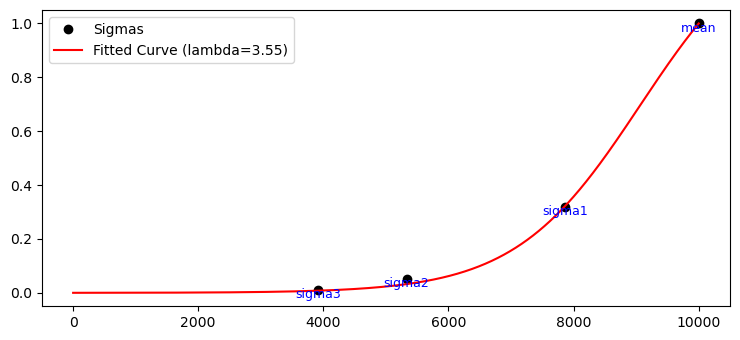

In [119]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

def f(x, lambd=3.5):
    return lambd/(np.exp((10000 - x)/1000)-1+lambd)
def objective(lambd):
    y_pred = f(x_sd, lambd)
    return np.sum((y_pred - y_sd) ** 2)


x_sd =np.array([10000, sd1, sd2, sd3])
y_sd = np.array([1, 1-0.68, 1-0.95, 1-0.99])
point_labels = ['mean', 'sigma1', 'sigma2', 'sigma3']
# Optimization using scipy
initial_lambd = 3.5
result = minimize(objective, initial_lambd, bounds=[(0.01, 10)])  # Setting bounds to avoid negative lambda values
optimal_lambd = result.x[0]

# Plot the results
x = np.linspace(0, 10000, 10000)
plt.plot(x_sd, y_sd, 'o', color='black', label='Sigmas')
# Adding point labels
for i, label in enumerate(point_labels):
    plt.text(x_sd[i] + 0.5, y_sd[i] - 0.03, label, fontsize=9, ha='center', color='blue')
plt.plot(x, f(x, optimal_lambd), color='red', label=f'Fitted Curve (lambda={optimal_lambd:.2f})')
plt.legend()
plt.show()


In [41]:
x = pd.Series()

day=unique_days[10]

comparison_date = [day+pd.Timedelta(days=0), day +pd.Timedelta(days=1), day+ pd.Timedelta(days=2), day +pd.Timedelta(days=3)]

extra_day = day +pd.Timedelta(days=3)

transactions_of_interest = df[df['Date_Transaction'].isin(comparison_date)]
risk_mapping = {'low': 1, 'medium': 2, 'high': 3, 'ultrahigh': 4}
transactions_of_interest['Risk_Country_numeric'] = transactions_of_interest['Risk_Country'].map(risk_mapping)

transactions_of_interest['Amount_EUR_abs'] = transactions_of_interest['Amount_EUR'].abs()

# Group by client and date, sum the amounts and get the highest risk value
trans_by_client_4 = transactions_of_interest.groupby('Customer_ID').agg({'Amount_EUR_abs': 'sum', 'RiskScore': 'max'}).reset_index()

# Sort the DataFrame by 'Customer_ID' and 'Date_Transaction'
transactions_of_interest = transactions_of_interest.sort_values(by=['Customer_ID', 'Date_Transaction_with_hours'])

# Calculate the cumulative sum of 'Amount_EUR_abs' for each 'Customer_ID'
transactions_of_interest['Cumulative_Sum'] = transactions_of_interest.groupby('Customer_ID')['Amount_EUR_abs'].cumsum()

# Define the threshold
threshold = 10000

# Identify the first instance where the cumulative sum exceeds the threshold for each client
threshold_reached = transactions_of_interest[transactions_of_interest['Cumulative_Sum'] > threshold].groupby('Customer_ID').first().reset_index()

# Select only necessary columns and rename for clarity
threshold_reached = threshold_reached[['Customer_ID', 'Date_Transaction_with_hours']].rename(columns={'Date_Transaction_with_hours': 'threshold_reached'})

# Group by client and summarize amounts and risk
trans_by_client_4 = transactions_of_interest.groupby('Customer_ID').agg({
    'Amount_EUR_abs': 'sum',
    'RiskScore': 'max'
}).reset_index()

# Merge the threshold reached datetime with the grouped data
trans_by_client_4 = pd.merge(trans_by_client_4, threshold_reached, on='Customer_ID', how='left')
trans_by_client_4['threshold_reached'] = pd.to_datetime(trans_by_client_4['threshold_reached'])


cluster=[]
hour_difference = []
for i in range(len(trans_by_client_4)):
    hour_difference.append(24*(trans_by_client_4.iloc[i]['threshold_reached'].day - comparison_date[0].day)+trans_by_client_4.iloc[i]['threshold_reached'].hour)
    if trans_by_client_4.iloc[i]['RiskScore']>3.4 and trans_by_client.iloc[i]['RiskScore']<5.10:
        mylist = [0, 1]
        weigh=[1-min(trans_by_client_4.iloc[i]['Amount_EUR_abs'], 10000)/25000, min(trans_by_client_4.iloc[i]['Amount_EUR_abs'], 10000)/25000]
        cluster.append(random.choices(mylist, weights = weigh, k = 1)[0])
    else:
        cluster.append(0)


trans_by_client_4['cluster']=cluster
trans_by_client_4['hour'] =hour_difference
trans_by_client_4

/tmp/ipykernel_14474/1358788164.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  x = pd.Series()
/tmp/ipykernel_14474/1358788164.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_of_interest['Risk_Country_numeric'] = transactions_of_interest['Risk_Country'].map(risk_mapping)
/tmp/ipykernel_14474/1358788164.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_of

,Customer_ID,Amount_EUR_abs,RiskScore,threshold_reached,cluster,hour
0,1000,12803,3.95,2023-03-14 20:42:57,1,92.0
1,1001,22960,4.57,2023-03-14 02:13:56,0,74.0
2,1002,24229,4.45,2023-03-13 21:11:31,1,69.0
3,1007,11526,4.45,2023-03-12 18:45:02,0,42.0
4,1009,20269,4.72,2023-03-13 02:03:37,0,50.0
...,...,...,...,...,...,...
2995,8987,11407,4.19,2023-03-14 12:24:16,0,84.0
2996,8989,45957,4.66,2023-03-12 00:20:32,0,24.0
2997,8990,18794,3.85,2023-03-13 22:44:32,0,70.0
2998,8991,22620,5.00,2023-03-12 17:18:29,0,41.0


In [42]:
x = pd.Series()

day=unique_days[20]

comparison_date = [day+pd.Timedelta(days=0), day +pd.Timedelta(days=1), day+ pd.Timedelta(days=2), day +pd.Timedelta(days=3)]

extra_day = day +pd.Timedelta(days=3)

transactions_of_interest = df[df['Date_Transaction'].isin(comparison_date)]
risk_mapping = {'low': 1, 'medium': 2, 'high': 3, 'ultrahigh': 4}
transactions_of_interest['Risk_Country_numeric'] = transactions_of_interest['Risk_Country'].map(risk_mapping)

transactions_of_interest['Amount_EUR_abs'] = transactions_of_interest['Amount_EUR'].abs()

# Group by client and date, sum the amounts and get the highest risk value
trans_by_client = transactions_of_interest.groupby('Customer_ID').agg({'Amount_EUR_abs': 'sum', 'RiskScore': 'max'}).reset_index()

# Sort the DataFrame by 'Customer_ID' and 'Date_Transaction'
transactions_of_interest = transactions_of_interest.sort_values(by=['Customer_ID', 'Date_Transaction_with_hours'])

# Calculate the cumulative sum of 'Amount_EUR_abs' for each 'Customer_ID'
transactions_of_interest['Cumulative_Sum'] = transactions_of_interest.groupby('Customer_ID')['Amount_EUR_abs'].cumsum()

# Define the threshold
threshold = 10000

# Identify the first instance where the cumulative sum exceeds the threshold for each client
threshold_reached = transactions_of_interest[transactions_of_interest['Cumulative_Sum'] > threshold].groupby('Customer_ID').first().reset_index()

# Select only necessary columns and rename for clarity
threshold_reached = threshold_reached[['Customer_ID', 'Date_Transaction_with_hours']].rename(columns={'Date_Transaction_with_hours': 'threshold_reached'})

# Group by client and summarize amounts and risk
trans_by_client_1 = transactions_of_interest.groupby('Customer_ID').agg({
    'Amount_EUR_abs': 'sum',
    'RiskScore': 'max'
}).reset_index()

# Merge the threshold reached datetime with the grouped data
trans_by_client_1 = pd.merge(trans_by_client_1, threshold_reached, on='Customer_ID', how='left')
trans_by_client_1['threshold_reached'] = pd.to_datetime(trans_by_client_1['threshold_reached'])


cluster=[]
hour_difference = []
for i in range(len(trans_by_client_1)):
    hour_difference.append(24*(trans_by_client_1.iloc[i]['threshold_reached'].day - comparison_date[0].day)+trans_by_client_1.iloc[i]['threshold_reached'].hour)
    if trans_by_client_1.iloc[i]['RiskScore']>3.4 and trans_by_client_1.iloc[i]['RiskScore']<5.10:
        mylist = [0, 1]
        weigh=[1-min(trans_by_client_1.iloc[i]['Amount_EUR_abs'], 10000)/25000, min(trans_by_client_1.iloc[i]['Amount_EUR_abs'], 10000)/25000]
        cluster.append(random.choices(mylist, weights = weigh, k = 1)[0])
    else:
        cluster.append(0)


trans_by_client_1['cluster']=cluster
trans_by_client_1['hour'] =hour_difference
trans_by_client_1

/tmp/ipykernel_14474/3610232340.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  x = pd.Series()
/tmp/ipykernel_14474/3610232340.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_of_interest['Risk_Country_numeric'] = transactions_of_interest['Risk_Country'].map(risk_mapping)
/tmp/ipykernel_14474/3610232340.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_of

,Customer_ID,Amount_EUR_abs,RiskScore,threshold_reached,cluster,hour
0,1000,23464,4.45,2023-03-23 05:13:43,0,53.0
1,1001,20291,5.00,2023-03-23 18:11:29,1,66.0
2,1002,23949,5.00,2023-03-22 10:01:09,0,34.0
3,1007,13571,3.85,2023-03-24 19:18:37,0,91.0
4,1009,18781,3.85,2023-03-22 02:10:17,1,26.0
...,...,...,...,...,...,...
2995,8987,23671,4.19,2023-03-23 08:22:07,0,56.0
2996,8989,42248,3.85,2023-03-22 14:29:16,1,38.0
2997,8990,15945,3.85,2023-03-23 03:01:50,1,51.0
2998,8991,13979,3.85,2023-03-23 07:42:00,0,55.0


In [4]:
x = pd.Series()

day=unique_days[40]

comparison_date = [day+pd.Timedelta(days=0), day +pd.Timedelta(days=1), day+ pd.Timedelta(days=2), day +pd.Timedelta(days=3)]

extra_day = day +pd.Timedelta(days=3)

transactions_of_interest = df[df['Date_Transaction'].isin(comparison_date)]
risk_mapping = {'low': 1, 'medium': 2, 'high': 3, 'ultrahigh': 4}
transactions_of_interest['Risk_Country_numeric'] = transactions_of_interest['Risk_Country'].map(risk_mapping)

transactions_of_interest['Amount_EUR_abs'] = transactions_of_interest['Amount_EUR'].abs()

# Group by client and date, sum the amounts and get the highest risk value
trans_by_client_2 = transactions_of_interest.groupby('Customer_ID').agg({'Amount_EUR_abs': 'sum', 'RiskScore': 'max'}).reset_index()

# Sort the DataFrame by 'Customer_ID' and 'Date_Transaction'
transactions_of_interest = transactions_of_interest.sort_values(by=['Customer_ID', 'Date_Transaction_with_hours'])

# Calculate the cumulative sum of 'Amount_EUR_abs' for each 'Customer_ID'
transactions_of_interest['Cumulative_Sum'] = transactions_of_interest.groupby('Customer_ID')['Amount_EUR_abs'].cumsum()

# Define the threshold
threshold = 10000

# Identify the first instance where the cumulative sum exceeds the threshold for each client
threshold_reached = transactions_of_interest[transactions_of_interest['Cumulative_Sum'] > threshold].groupby('Customer_ID').first().reset_index()

# Select only necessary columns and rename for clarity
threshold_reached = threshold_reached[['Customer_ID', 'Date_Transaction_with_hours']].rename(columns={'Date_Transaction_with_hours': 'threshold_reached'})

# Group by client and summarize amounts and risk
trans_by_client_2 = transactions_of_interest.groupby('Customer_ID').agg({
    'Amount_EUR_abs': 'sum',
    'RiskScore': 'max'
}).reset_index()

# Merge the threshold reached datetime with the grouped data
trans_by_client_2 = pd.merge(trans_by_client_2, threshold_reached, on='Customer_ID', how='left')
trans_by_client_2['threshold_reached'] = pd.to_datetime(trans_by_client_2['threshold_reached'])


cluster=[]
hour_difference = []
for i in range(len(trans_by_client_2)):
    hour_difference.append(24*(trans_by_client_2.iloc[i]['threshold_reached'].day - comparison_date[0].day)+trans_by_client_2.iloc[i]['threshold_reached'].hour)
    if trans_by_client_2.iloc[i]['RiskScore']>3.4 and trans_by_client_2.iloc[i]['RiskScore']<5.10:
        mylist = [0, 1]
        weigh=[1-min(trans_by_client_2.iloc[i]['Amount_EUR_abs'], 10000)/25000, min(trans_by_client_2.iloc[i]['Amount_EUR_abs'], 10000)/25000]
        cluster.append(random.choices(mylist, weights = weigh, k = 1)[0])
    else:
        cluster.append(0)


trans_by_client_2['cluster']=cluster
trans_by_client_2['hour'] =hour_difference
trans_by_client=trans_by_client_2

/tmp/ipykernel_5060/4165985810.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  x = pd.Series()
/tmp/ipykernel_5060/4165985810.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_of_interest['Risk_Country_numeric'] = transactions_of_interest['Risk_Country'].map(risk_mapping)
/tmp/ipykernel_5060/4165985810.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_of_in

In [5]:
trans_by_client = trans_by_client_2

In [44]:
frames = [trans_by_client_4, trans_by_client_1, trans_by_client_2]

trans_by_client = pd.concat(frames)

In [7]:
import numpy as np
strict_res = np.where(
    (trans_by_client['RiskScore'] >= 3.91) & 
    (trans_by_client['RiskScore'] <= 5.05) & 
    (trans_by_client['Amount_EUR_abs'] >= 10000),
    1, 0
).tolist()


In [8]:
def calculate_equivalence(d, divider, lammbda=100,):
    eqvi=lammbda / (math.exp(d / divider) - 1 + lammbda)
    return eqvi

In [9]:
eq_amount = trans_by_client['Amount_EUR_abs'].apply(lambda x: calculate_equivalence(abs(min(x, 10000) - 10000), 10000, 10)).tolist()
eq_risk = trans_by_client['RiskScore'].apply(lambda x: calculate_equivalence(abs(min(x, 5.05) - 5.05), 1, 2)).tolist()
eq_hour = trans_by_client['hour'].apply(lambda x: calculate_equivalence(abs(max(x, 72) - 72), 10, 2)).tolist()


In [10]:
trans_by_client

,Customer_ID,Amount_EUR_abs,RiskScore,threshold_reached,cluster,hour
0,1000,15384,4.60,2023-04-13 16:44:18,0,88.0
1,1001,12680,2.57,2023-04-12 16:35:36,0,64.0
2,1002,23472,0.64,2023-04-11 03:26:22,0,27.0
3,1007,54739,4.98,2023-04-11 06:42:25,1,30.0
4,1009,21803,4.60,2023-04-12 04:21:26,0,52.0
...,...,...,...,...,...,...
2993,8987,12982,4.93,2023-05-31 23:25:51,0,71.0
2994,8989,47946,4.85,2023-05-29 16:24:14,0,16.0
2995,8990,16941,4.21,2023-05-30 09:38:43,0,33.0
2996,8991,9643,4.34,NaT,0,NaN


In [11]:
trans_by_client['eq_amount'] = eq_amount
trans_by_client['eq_risk'] = eq_risk
trans_by_client['eq_hour'] = eq_hour
new_df = trans_by_client[['Amount_EUR_abs', 'RiskScore', 'hour','eq_amount', 'eq_risk', 'eq_hour', 'cluster']]
new_df['eq_hour'] = new_df['eq_hour'].fillna(0)
new_df['hour'] = new_df['hour'].fillna(0)

/tmp/ipykernel_19913/3525222973.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['eq_hour'] = new_df['eq_hour'].fillna(0)
/tmp/ipykernel_19913/3525222973.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['hour'] = new_df['hour'].fillna(0)


In [12]:
new_df

,Amount_EUR_abs,RiskScore,hour,eq_amount,eq_risk,eq_hour,cluster
0,15384,4.60,88.0,1.000000,0.778722,0.335963,0
1,12680,2.57,64.0,1.000000,0.154544,1.000000,0
2,23472,0.64,27.0,1.000000,0.024018,1.000000,0
3,54739,4.98,30.0,1.000000,0.965014,1.000000,1
4,21803,4.60,52.0,1.000000,0.778722,1.000000,0
...,...,...,...,...,...,...,...
2993,12982,4.93,71.0,1.000000,0.940072,1.000000,0
2994,47946,4.85,16.0,1.000000,0.900332,1.000000,0
2995,16941,4.21,33.0,1.000000,0.603070,1.000000,0
2996,9643,4.34,0.0,0.996379,0.659198,0.000000,0


In [13]:
train, test, val = new_df[:240000], new_df[240000:270000], new_df[270000:]

In [14]:
train_np, test_np, val_np = train.to_numpy(), test.to_numpy(), val.to_numpy()
train_np.shape, test_np.shape, val_np.shape


((240000, 7), (30000, 7), (2989, 7))

In [15]:
x_train, y_train = train_np[:, :-1], train_np[:, -1]
x_test, y_test = test_np[:, :-1], test_np[:, -1]
x_val, y_val = val_np[:, :-1], val_np[:, -1]
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((240000, 6), (240000,), (30000, 6), (30000,), (2989, 6), (2989,))

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint


2024-10-11 01:15:25.688083: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-11 01:15:25.691451: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-11 01:15:25.751952: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-11 01:15:25.752893: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-11 01:15:26.581934: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [18]:
def neural_net_predictions(model, x):
    return (model.predict(x).flatten() > 0.5).astype(int)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, InputLayer
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

# Define the neural network
model = Sequential()
model.add(InputLayer((x_train.shape[1],)))

# First hidden layer
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Second hidden layer
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy', 'Recall'])

# Set up callbacks
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_recall', mode='max', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_recall', mode='max', patience=5, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=50,
    batch_size=16,  # Adjusted for your dataset size
    callbacks=[checkpoint, early_stopping],
    #class_weight={0: 0.7, 1: 0.3},  # Adjust weights due to imbalance
    verbose=1
)


Epoch 1/50
14988/15000 [============================>.] - ETA: 0s - loss: 0.6392 - accuracy: 0.6657 - recall: 0.0179
Epoch 1: val_recall improved from -inf to 0.00000, saving model to best_model.h5
15000/15000 [==============================] - 20s 1ms/step - loss: 0.6392 - accuracy: 0.6657 - recall: 0.0179 - val_loss: 0.6023 - val_accuracy: 0.7076 - val_recall: 0.0000e+00
Epoch 2/50
  119/15000 [..............................] - ETA: 19s - loss: 0.6412 - accuracy: 0.6560 - recall: 0.0015    

/home/jelizaveta.jelinska/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


14970/15000 [============================>.] - ETA: 0s - loss: 0.6335 - accuracy: 0.6708 - recall: 1.9024e-04
Epoch 2: val_recall did not improve from 0.00000
15000/15000 [==============================] - 19s 1ms/step - loss: 0.6335 - accuracy: 0.6708 - recall: 1.8988e-04 - val_loss: 0.6079 - val_accuracy: 0.7073 - val_recall: 0.0000e+00
Epoch 3/50
14976/15000 [============================>.] - ETA: 0s - loss: 0.6337 - accuracy: 0.6708 - recall: 0.0000e+00
Epoch 3: val_recall improved from 0.00000 to 0.00114, saving model to best_model.h5
15000/15000 [==============================] - 19s 1ms/step - loss: 0.6337 - accuracy: 0.6708 - recall: 0.0000e+00 - val_loss: 0.6296 - val_accuracy: 0.7073 - val_recall: 0.0011
Epoch 4/50
14992/15000 [============================>.] - ETA: 0s - loss: 0.6337 - accuracy: 0.6709 - recall: 0.0000e+00
Epoch 4: val_recall did not improve from 0.00114
15000/15000 [==============================] - 19s 1ms/step - loss: 0.6337 - accuracy: 0.6708 - recall: 0.

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_val, neural_net_predictions(model, x_val), target_names=['Not Fraud', 'Fraud']))

94/94 [==============================] - 0s 848us/step
              precision    recall  f1-score   support

   Not Fraud       0.71      1.00      0.83      2115
       Fraud       0.33      0.00      0.00       874

    accuracy                           0.71      2989
   macro avg       0.52      0.50      0.42      2989
weighted avg       0.60      0.71      0.59      2989



In [21]:
not_frauds = new_df.query('cluster == 0')
frauds = new_df.query('cluster == 1')
not_frauds['cluster'].value_counts(), frauds['cluster'].value_counts()

(0    182997
 Name: cluster, dtype: int64,
 1    89992
 Name: cluster, dtype: int64)

In [22]:
balanced_df = pd.concat([frauds, not_frauds.sample(len(frauds), random_state=1)])
balanced_df['cluster'].value_counts()

1    89992
0    89992
Name: cluster, dtype: int64

In [23]:
balanced_df = balanced_df.sample(frac=1, random_state=1)
balanced_df

,Amount_EUR_abs,RiskScore,hour,eq_amount,eq_risk,eq_hour,cluster
1015,42152,4.20,14.0,1.0,0.598866,1.0,0
1389,17750,4.34,52.0,1.0,0.659198,1.0,0
766,10305,4.75,-628.0,1.0,0.851115,1.0,1
950,27277,4.54,35.0,1.0,0.750387,1.0,0
989,22314,4.98,68.0,1.0,0.965014,1.0,1
...,...,...,...,...,...,...,...
970,34513,4.98,36.0,1.0,0.965014,1.0,1
1668,16743,2.57,61.0,1.0,0.154544,1.0,0
1816,43865,4.60,19.0,1.0,0.778722,1.0,1
465,22695,4.46,27.0,1.0,0.713270,1.0,1


In [24]:
balanced_df_np = balanced_df.to_numpy()

x_train_b, y_train_b = balanced_df_np[:150000, :-1], balanced_df_np[:150000, -1].astype(int)
x_test_b, y_test_b = balanced_df_np[150000:165000, :-1], balanced_df_np[150000:165000, -1].astype(int)
x_val_b, y_val_b = balanced_df_np[165000:, :-1], balanced_df_np[165000:, -1].astype(int)
x_train_b.shape, y_train_b.shape, x_test_b.shape, y_test_b.shape, x_val_b.shape, y_val_b.shape

((150000, 6), (150000,), (15000, 6), (15000,), (14984, 6), (14984,))

In [25]:
pd.Series(y_train_b).value_counts(), pd.Series(y_test_b).value_counts(), pd.Series(y_val_b).value_counts()

(1    75037
 0    74963
 dtype: int64,
 0    7545
 1    7455
 dtype: int64,
 1    7500
 0    7484
 dtype: int64)

In [26]:
# Define the neural network
model = Sequential()
model.add(InputLayer((x_train_b.shape[1],)))

# First hidden layer
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Second hidden layer
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy', 'Recall'])

# Set up callbacks
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_recall', mode='max', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_recall', mode='max', patience=5, verbose=1, restore_best_weights=True)
# Train the model
history = model.fit(
    x_train_b, y_train_b,
    validation_data=(x_val, y_val),
    epochs=50,
    batch_size=16,  # Adjusted for your dataset size
    callbacks=[checkpoint, early_stopping],
    #class_weight={0: 0.7, 1: 0.3},  # Adjust weights due to imbalance
    verbose=1
)


Epoch 1/50
9355/9375 [============================>.] - ETA: 0s - loss: 0.6991 - accuracy: 0.5270 - recall: 0.5679
Epoch 1: val_recall improved from -inf to 0.34668, saving model to best_model.h5
9375/9375 [==============================] - 14s 1ms/step - loss: 0.6991 - accuracy: 0.5270 - recall: 0.5681 - val_loss: 0.6620 - val_accuracy: 0.6250 - val_recall: 0.3467
Epoch 2/50
 116/9375 [..............................] - ETA: 12s - loss: 0.6920 - accuracy: 0.5291 - recall: 0.6667

/home/jelizaveta.jelinska/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9343/9375 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5259 - recall: 0.5646
Epoch 2: val_recall did not improve from 0.34668
9375/9375 [==============================] - 12s 1ms/step - loss: 0.6913 - accuracy: 0.5259 - recall: 0.5642 - val_loss: 0.6972 - val_accuracy: 0.6424 - val_recall: 0.2529
Epoch 3/50
9353/9375 [============================>.] - ETA: 0s - loss: 0.6932 - accuracy: 0.5025 - recall: 0.5290
Epoch 3: val_recall improved from 0.34668 to 0.99886, saving model to best_model.h5
9375/9375 [==============================] - 12s 1ms/step - loss: 0.6932 - accuracy: 0.5024 - recall: 0.5294 - val_loss: 0.7031 - val_accuracy: 0.2927 - val_recall: 0.9989
Epoch 4/50
9349/9375 [============================>.] - ETA: 0s - loss: 0.6934 - accuracy: 0.5006 - recall: 0.5016
Epoch 4: val_recall did not improve from 0.99886
9375/9375 [==============================] - 12s 1ms/step - loss: 0.6934 - accuracy: 0.5005 - recall: 0.5022 - val_loss: 0.7275 - val_accura

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_val_b, neural_net_predictions(model, x_val_b), target_names=['Not Fraud', 'Fraud']))

469/469 [==============================] - 0s 750us/step
              precision    recall  f1-score   support

   Not Fraud       0.00      0.00      0.00      7484
       Fraud       0.50      1.00      0.67      7500

    accuracy                           0.50     14984
   macro avg       0.25      0.50      0.33     14984
weighted avg       0.25      0.50      0.33     14984



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
# Define the neural network
model = Sequential()
model.add(InputLayer((x_train_b.shape[1],)))

# First hidden layer
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Second hidden layer
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Third hidden layer
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Fourth hidden layer
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fifth hidden layer
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy', 'Recall'])

# Set up callbacks
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_recall', mode='max', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_recall', mode='max', patience=40, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(
    x_train_b, y_train_b,
    validation_data=(x_val_b, y_val_b),
    epochs=100,
    batch_size=32,  # Adjusted for your dataset size
    callbacks=[checkpoint, early_stopping],
    # class_weight={0: 0.7, 1: 0.3},  # Uncomment if dealing with imbalance
    verbose=1
)


Epoch 1/100
4684/4688 [============================>.] - ETA: 0s - loss: 0.7050 - accuracy: 0.5185 - recall: 0.5352
Epoch 1: val_recall improved from -inf to 0.59400, saving model to best_model.h5
4688/4688 [==============================] - 15s 3ms/step - loss: 0.7050 - accuracy: 0.5185 - recall: 0.5353 - val_loss: 0.6892 - val_accuracy: 0.5381 - val_recall: 0.5940
Epoch 2/100
  43/4688 [..............................] - ETA: 11s - loss: 0.6925 - accuracy: 0.5167 - recall: 0.5953

/home/jelizaveta.jelinska/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4679/4688 [============================>.] - ETA: 0s - loss: 0.6904 - accuracy: 0.5311 - recall: 0.6084
Epoch 2: val_recall improved from 0.59400 to 0.60227, saving model to best_model.h5
4688/4688 [==============================] - 12s 3ms/step - loss: 0.6904 - accuracy: 0.5311 - recall: 0.6084 - val_loss: 0.6884 - val_accuracy: 0.5390 - val_recall: 0.6023
Epoch 3/100
4681/4688 [============================>.] - ETA: 0s - loss: 0.6906 - accuracy: 0.5281 - recall: 0.6091
Epoch 3: val_recall improved from 0.60227 to 0.78533, saving model to best_model.h5
4688/4688 [==============================] - 12s 3ms/step - loss: 0.6906 - accuracy: 0.5281 - recall: 0.6094 - val_loss: 0.6905 - val_accuracy: 0.5359 - val_recall: 0.7853
Epoch 4/100
4681/4688 [============================>.] - ETA: 0s - loss: 0.6924 - accuracy: 0.5116 - recall: 0.6346
Epoch 4: val_recall improved from 0.78533 to 1.00000, saving model to best_model.h5
4688/4688 [==============================] - 11s 2ms/step - loss: 0.

In [33]:
print(classification_report(y_val_b, neural_net_predictions(model, x_val_b), target_names=['Not Fraud', 'Fraud']))

469/469 [==============================] - 1s 964us/step
              precision    recall  f1-score   support

   Not Fraud       0.00      0.00      0.00      7484
       Fraud       0.50      1.00      0.67      7500

    accuracy                           0.50     14984
   macro avg       0.25      0.50      0.33     14984
weighted avg       0.25      0.50      0.33     14984



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
